In [1]:
import pandas as pd
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 
from sklearn.preprocessing import LabelEncoder
import seaborn as sns

In [2]:
df1 = pd.read_csv(r"D:\singapore\ResaleFlatPricesBasedonApprovalDate19901999.csv")
df2 = pd.read_csv(r"D:\singapore\ResaleFlatPricesBasedonApprovalDate2000Feb2012.csv")
df3 = pd.read_csv(r"D:\singapore\ResaleFlatPricesBasedonRegistrationDateFromMar2012toDec2014.csv")
df4 = pd.read_csv(r"D:\singapore\ResaleFlatPricesBasedonRegistrationDateFromJan2015toDec2016.csv")
df5 = pd.read_csv(r"D:\singapore\ResaleflatpricesbasedonregistrationdatefromJan2017onwards (1).csv")

df = pd.concat([df1,df2,df3,df4,df5], ignore_index=True)
df

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,remaining_lease
0,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977,9000.0,NaN
1,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,04 TO 06,31.0,IMPROVED,1977,6000.0,NaN
2,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977,8000.0,NaN
3,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,07 TO 09,31.0,IMPROVED,1977,6000.0,NaN
4,1990-01,ANG MO KIO,3 ROOM,216,ANG MO KIO AVE 1,04 TO 06,73.0,NEW GENERATION,1976,47200.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...
933297,2024-08,YISHUN,5 ROOM,644,YISHUN ST 61,07 TO 09,121.0,Improved,1988,650000.0,62 years 11 months
933298,2024-08,YISHUN,5 ROOM,760,YISHUN ST 72,10 TO 12,122.0,Improved,1987,652000.0,61 years 09 months
933299,2024-08,YISHUN,EXECUTIVE,326,YISHUN RING RD,10 TO 12,153.0,Maisonette,1988,950000.0,63 years
933300,2024-08,YISHUN,EXECUTIVE,643,YISHUN ST 61,01 TO 03,146.0,Maisonette,1987,770000.0,62 years 03 months


In [3]:
df.columns

Index(['month', 'town', 'flat_type', 'block', 'street_name', 'storey_range',
       'floor_area_sqm', 'flat_model', 'lease_commence_date', 'resale_price',
       'remaining_lease'],
      dtype='object')

In [4]:
df.describe()

,floor_area_sqm,lease_commence_date,resale_price
count,933302.000000,933302.000000,9.333020e+05
mean,95.686682,1988.341345,3.227021e+05
std,25.815137,10.729018,1.722619e+05
min,28.000000,1966.000000,5.000000e+03
25%,73.000000,1981.000000,1.945000e+05
50%,93.000000,1986.000000,2.990000e+05
75%,113.000000,1996.000000,4.200000e+05
max,366.700000,2020.000000,1.588000e+06


Data cleaning

In [5]:
df.nunique()

month                   416
town                     27
flat_type                 8
block                  2712
street_name             584
storey_range             25
floor_area_sqm          213
flat_model               34
lease_commence_date      55
resale_price           9604
remaining_lease         727
dtype: int64

In [6]:
df.isna().sum()

month                       0
town                        0
flat_type                   0
block                       0
street_name                 0
storey_range                0
floor_area_sqm              0
flat_model                  0
lease_commence_date         0
resale_price                0
remaining_lease        709050
dtype: int64

In [7]:
# Assuming you want to drop the column named 'remaining_lease'
df.drop('remaining_lease', axis=1, inplace=True)

In [8]:
df.isna().sum()

month                  0
town                   0
flat_type              0
block                  0
street_name            0
storey_range           0
floor_area_sqm         0
flat_model             0
lease_commence_date    0
resale_price           0
dtype: int64

In [9]:
# Split the 'storey_range' into two new columns
df[['storey_lower_bound', 'storey_upper_bound']] = df['storey_range'].str.split(' TO ', expand=True)
# Convert to integers
df['storey_lower_bound'] = df['storey_lower_bound'].astype(int)
df['storey_upper_bound'] = df['storey_upper_bound'].astype(int)
# Drop the original 'storey_range' column
df.drop("storey_range", axis=1,inplace=True)
df.head()

,month,town,flat_type,block,street_name,floor_area_sqm,flat_model,lease_commence_date,resale_price,storey_lower_bound,storey_upper_bound
0,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,31.0,IMPROVED,1977,9000.0,10,12
1,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,31.0,IMPROVED,1977,6000.0,4,6
2,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,31.0,IMPROVED,1977,8000.0,10,12
3,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,31.0,IMPROVED,1977,6000.0,7,9
4,1990-01,ANG MO KIO,3 ROOM,216,ANG MO KIO AVE 1,73.0,NEW GENERATION,1976,47200.0,4,6


In [10]:
# Splitting the 'month' column into 'resale_year' and 'resale_month'
df[['resale_year', 'resale_month']] = df['month'].str.split('-', expand=True)

# Convert the 'resale_year' and 'resale_month' columns to integer type (if needed)
df['resale_year'] = df['resale_year'].astype(int)
df['resale_month'] = df['resale_month'].astype(int)

# Drop the original 'month' column
df.drop("month", axis=1, inplace=True)


In [11]:
# convert a numerical values
# df['block'] = pd.to_numeric(df['block'], errors='coerce')
df['storey_upper_bound'] = pd.to_numeric(df['storey_upper_bound'], errors='coerce')
df['storey_upper_bound'] = pd.to_numeric(df['storey_upper_bound'], errors='coerce')


In [12]:
df.isna().sum()

town                   0
flat_type              0
block                  0
street_name            0
floor_area_sqm         0
flat_model             0
lease_commence_date    0
resale_price           0
storey_lower_bound     0
storey_upper_bound     0
resale_year            0
resale_month           0
dtype: int64

TEXT ERRORS

In [13]:
df['town'].value_counts()

town
TAMPINES           80383
YISHUN             70461
JURONG WEST        67103
BEDOK              66963
WOODLANDS          65975
ANG MO KIO         52346
HOUGANG            51067
BUKIT BATOK        44825
CHOA CHU KANG      38613
BUKIT MERAH        34591
PASIR RIS          33367
SENGKANG           32947
TOA PAYOH          31727
QUEENSTOWN         28929
GEYLANG            28344
CLEMENTI           28167
BUKIT PANJANG      27874
KALLANG/WHAMPOA    27411
JURONG EAST        24904
SERANGOON          22931
BISHAN             21361
PUNGGOL            21115
SEMBAWANG          14043
MARINE PARADE       8068
CENTRAL AREA        7192
BUKIT TIMAH         2531
LIM CHU KANG          64
Name: count, dtype: int64

In [14]:
df['flat_type'].value_counts()

flat_type
4 ROOM              355013
3 ROOM              297485
5 ROOM              196878
EXECUTIVE            70052
2 ROOM               12025
1 ROOM                1305
MULTI GENERATION       279
MULTI-GENERATION       265
Name: count, dtype: int64

In [15]:
# Replace 'MULTI-GENERATION' with 'MULTI GENERATION' in the specified column to avoid duplicate
df['flat_type'] = df['flat_type'].str.replace('MULTI-GENERATION', 'MULTI GENERATION')

In [16]:
df['flat_type'].value_counts()

flat_type
4 ROOM              355013
3 ROOM              297485
5 ROOM              196878
EXECUTIVE            70052
2 ROOM               12025
1 ROOM                1305
MULTI GENERATION       544
Name: count, dtype: int64

In [17]:
df['street_name'].value_counts()

street_name
YISHUN RING RD        17673
BEDOK RESERVOIR RD    14790
ANG MO KIO AVE 10     13866
ANG MO KIO AVE 3      12203
HOUGANG AVE 8          9399
                      ...  
GEYLANG EAST AVE 2       15
SEMBAWANG WAY            15
OUTRAM HILL               9
MARINE PARADE CTRL        3
ALJUNIED AVE 2            1
Name: count, Length: 584, dtype: int64

In [18]:
df['flat_model'].value_counts()

flat_model
Model A                   197193
Improved                  169679
New Generation            110821
NEW GENERATION             78898
IMPROVED                   73589
MODEL A                    70381
Premium Apartment          47423
Simplified                 34522
Apartment                  25782
Standard                   25310
SIMPLIFIED                 23258
Maisonette                 17598
STANDARD                   17375
MAISONETTE                 12215
Model A2                   10209
APARTMENT                   9901
DBSS                        3369
Adjoined flat               1261
Model A-Maisonette          1104
MODEL A-MAISONETTE           982
Terrace                      449
Type S1                      443
MULTI GENERATION             279
Multi Generation             265
TERRACE                      247
Type S2                      219
2-room                       138
Premium Apartment Loft       113
Premium Maisonette            86
Improved-Maisonette           83

In [19]:
# Replace specific values in the 'flat_model' column of the DataFrame 'df'
df['flat_model'] = df['flat_model'].replace({'MODEL A':'Model A','NEW GENERATION':'New Generation',
                                             'IMPROVED':'Improved','PREMIUM APARTMENT':'Premium Apartment',
                                             'MULTI GENERATION':'Multi Generation ','2-ROOM':'2-room',
                                            'SIMPLIFIED':'Simplified','STANDARD':'Standard',
                                             'MAISONETTE':'Maisonette','MULTI GENERATION':'Multi Generation',
                                             'APARTMENT':'Apartment','MODEL A-MAISONETTE':'Model A-Maisonette',
                                             'TERRACE':'Terrace','IMPROVED-MAISONETTE':'Improved-Maisonette'})

In [20]:
df['flat_model'].value_counts()

flat_model
Model A                   267574
Improved                  243268
New Generation            189719
Simplified                 57780
Premium Apartment          47429
Standard                   42685
Apartment                  35683
Maisonette                 29813
Model A2                   10209
DBSS                        3369
Model A-Maisonette          2086
Adjoined flat               1261
Terrace                      696
Multi Generation             544
Type S1                      443
Type S2                      219
2-room                       159
Improved-Maisonette          127
Premium Apartment Loft       113
Premium Maisonette            86
3Gen                          39
Name: count, dtype: int64

In [21]:
df['block'].value_counts()

block
2       4606
1       4064
110     3432
101     3414
4       3356
        ... 
376C       7
240A       5
83A        4
226E       2
226F       1
Name: count, Length: 2712, dtype: int64

Find Duplicates

In [22]:
# Count the number of duplicate rows in the DataFrame 'df'
df.duplicated().sum()

np.int64(1972)

In [23]:
# Remove duplicate rows from the DataFrame 'df'
df.drop_duplicates(inplace=True)

# Count the number of duplicate rows remaining in the DataFrame after removal
df.duplicated().sum()

np.int64(0)

Outliers

Using Boxplot

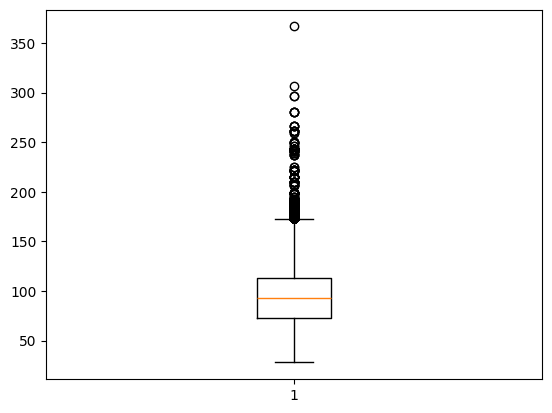

In [24]:
# Create a box plot for 'floor_area_sqm'
plt.boxplot(df['floor_area_sqm'] )

# show plot
plt.show()

In [25]:
import numpy as np
# Calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1 = np.percentile(df['floor_area_sqm'], 25)
Q3 = np.percentile(df['floor_area_sqm'], 75)

# Calculate the IQR
IQR = Q3 - Q1

# Determine outlier boundaries
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = df[(df['floor_area_sqm'] < lower_bound) | (df['floor_area_sqm'] > upper_bound)]

# Correctly clip the values of 'floor_area_sqm' to the outlier boundaries
df['floor_area_sqm'] = df['floor_area_sqm'].clip(lower=lower_bound, upper=upper_bound)


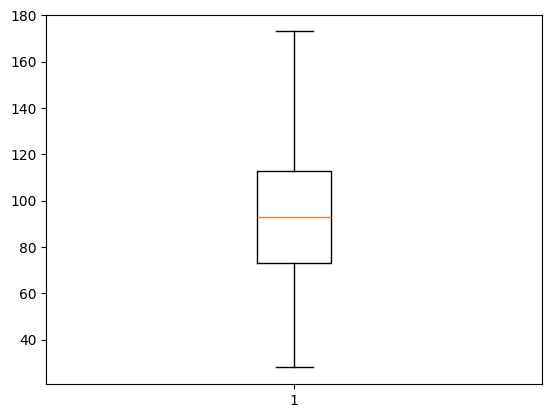

In [26]:
# Create a box plot for 'floor_area_sqm'
plt.boxplot(df['floor_area_sqm'] )

# show plot
plt.show()

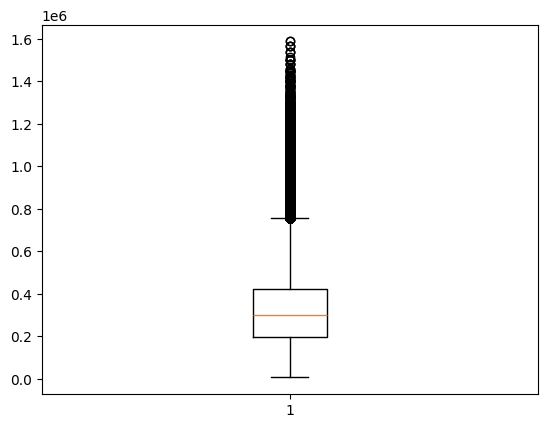

In [27]:
# Create a box plot for 'resale_price'
plt.boxplot(df['resale_price'] )

# show plot
plt.show()

In [28]:
import numpy as np
# Calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1 = np.percentile(df['resale_price'], 25)
Q3 = np.percentile(df['resale_price'], 75)

# Calculate the IQR
IQR = Q3 - Q1

# Determine outlier boundaries
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = df[(df['resale_price'] < lower_bound) | (df['resale_price'] > upper_bound)]

# Correctly clip the values of 'resale_price' to the outlier boundaries
df['resale_price'] = df['resale_price'].clip(lower=lower_bound, upper=upper_bound)

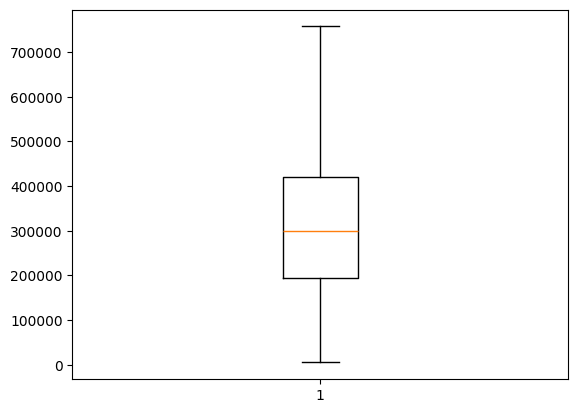

In [29]:
# Create a box plot for 'resale_price'
plt.boxplot(df['resale_price'] )

# show plot
plt.show()

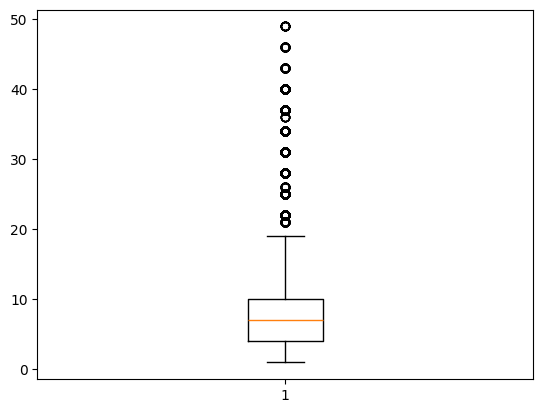

In [30]:
# Create a box plot for 'storey_lower_bound'
plt.boxplot(df['storey_lower_bound'] )

# show plot
plt.show()

In [31]:
import numpy as np
# Calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1 = np.percentile(df['storey_lower_bound'], 25)
Q3 = np.percentile(df['storey_lower_bound'], 75)

# Calculate the IQR
IQR = Q3 - Q1

# Determine outlier boundaries
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = df[(df['storey_lower_bound'] < lower_bound) | (df['storey_lower_bound'] > upper_bound)]

# Correctly clip the values of 'storey_lower_bound' to the outlier boundaries
df['storey_lower_bound'] = df['storey_lower_bound'].clip(lower=lower_bound, upper=upper_bound)

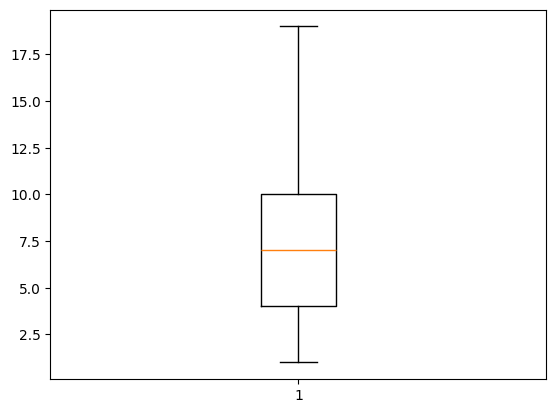

In [32]:
# Create a box plot for 'storey_lower_bound'
plt.boxplot(df['storey_lower_bound'] )

# show plot
plt.show()

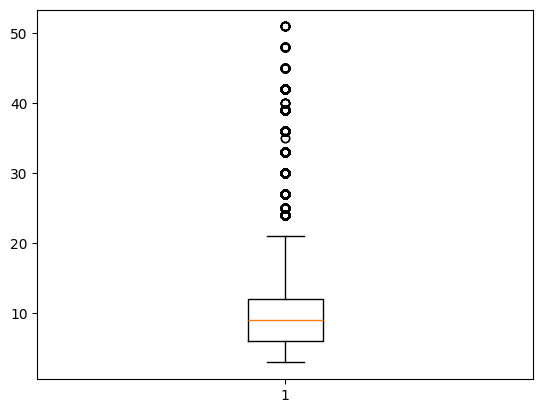

In [33]:
# Create a box plot for 'storey_upper_bound'
plt.boxplot(df['storey_upper_bound'] )

# show plot
plt.show()

In [34]:
import numpy as np
# Calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1 = np.percentile(df['storey_upper_bound'], 25)
Q3 = np.percentile(df['storey_upper_bound'], 75)

# Calculate the IQR
IQR = Q3 - Q1

# Determine outlier boundaries
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = df[(df['storey_upper_bound'] < lower_bound) | (df['storey_upper_bound'] > upper_bound)]

# Correctly clip the values of 'storey_upper_bound' to the outlier boundaries
df['storey_upper_bound'] = df['storey_upper_bound'].clip(lower=lower_bound, upper=upper_bound)

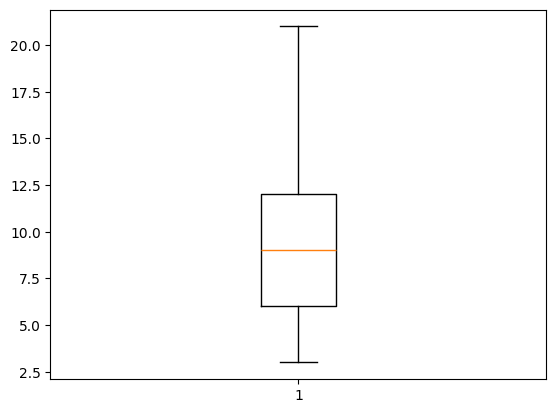

In [35]:
# Create a box plot for 'storey_upper_bound'
plt.boxplot(df['storey_upper_bound'] )

# show plot
plt.show()

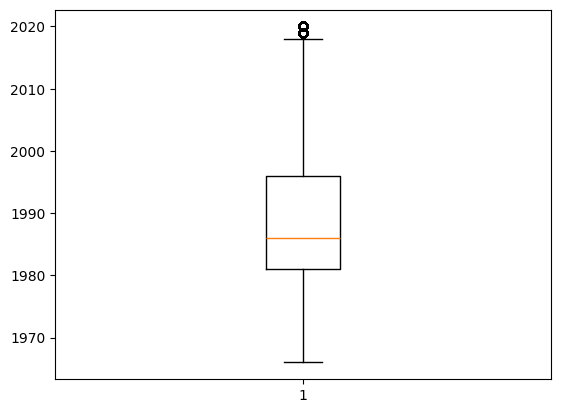

In [36]:
# Create a box plot for 'lease_commence_date'
plt.boxplot(df['lease_commence_date'] )

# show plot
plt.show()

In [37]:
import numpy as np
# Calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1 = np.percentile(df['lease_commence_date'], 25)
Q3 = np.percentile(df['lease_commence_date'], 75)

# Calculate the IQR
IQR = Q3 - Q1

# Determine outlier boundaries
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = df[(df['lease_commence_date'] < lower_bound) | (df['lease_commence_date'] > upper_bound)]

# Correctly clip the values of 'lease_commence_date' to the outlier boundaries
df['lease_commence_date'] = df['lease_commence_date'].clip(lower=lower_bound, upper=upper_bound)

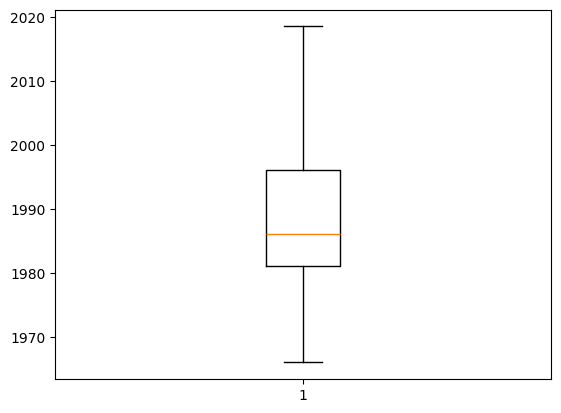

In [38]:
# Create a box plot for 'lease_commence_date'
plt.boxplot(df['lease_commence_date'] )
# show plot
plt.show()

EDA - EXPLORATARY DATA ANALYSIS

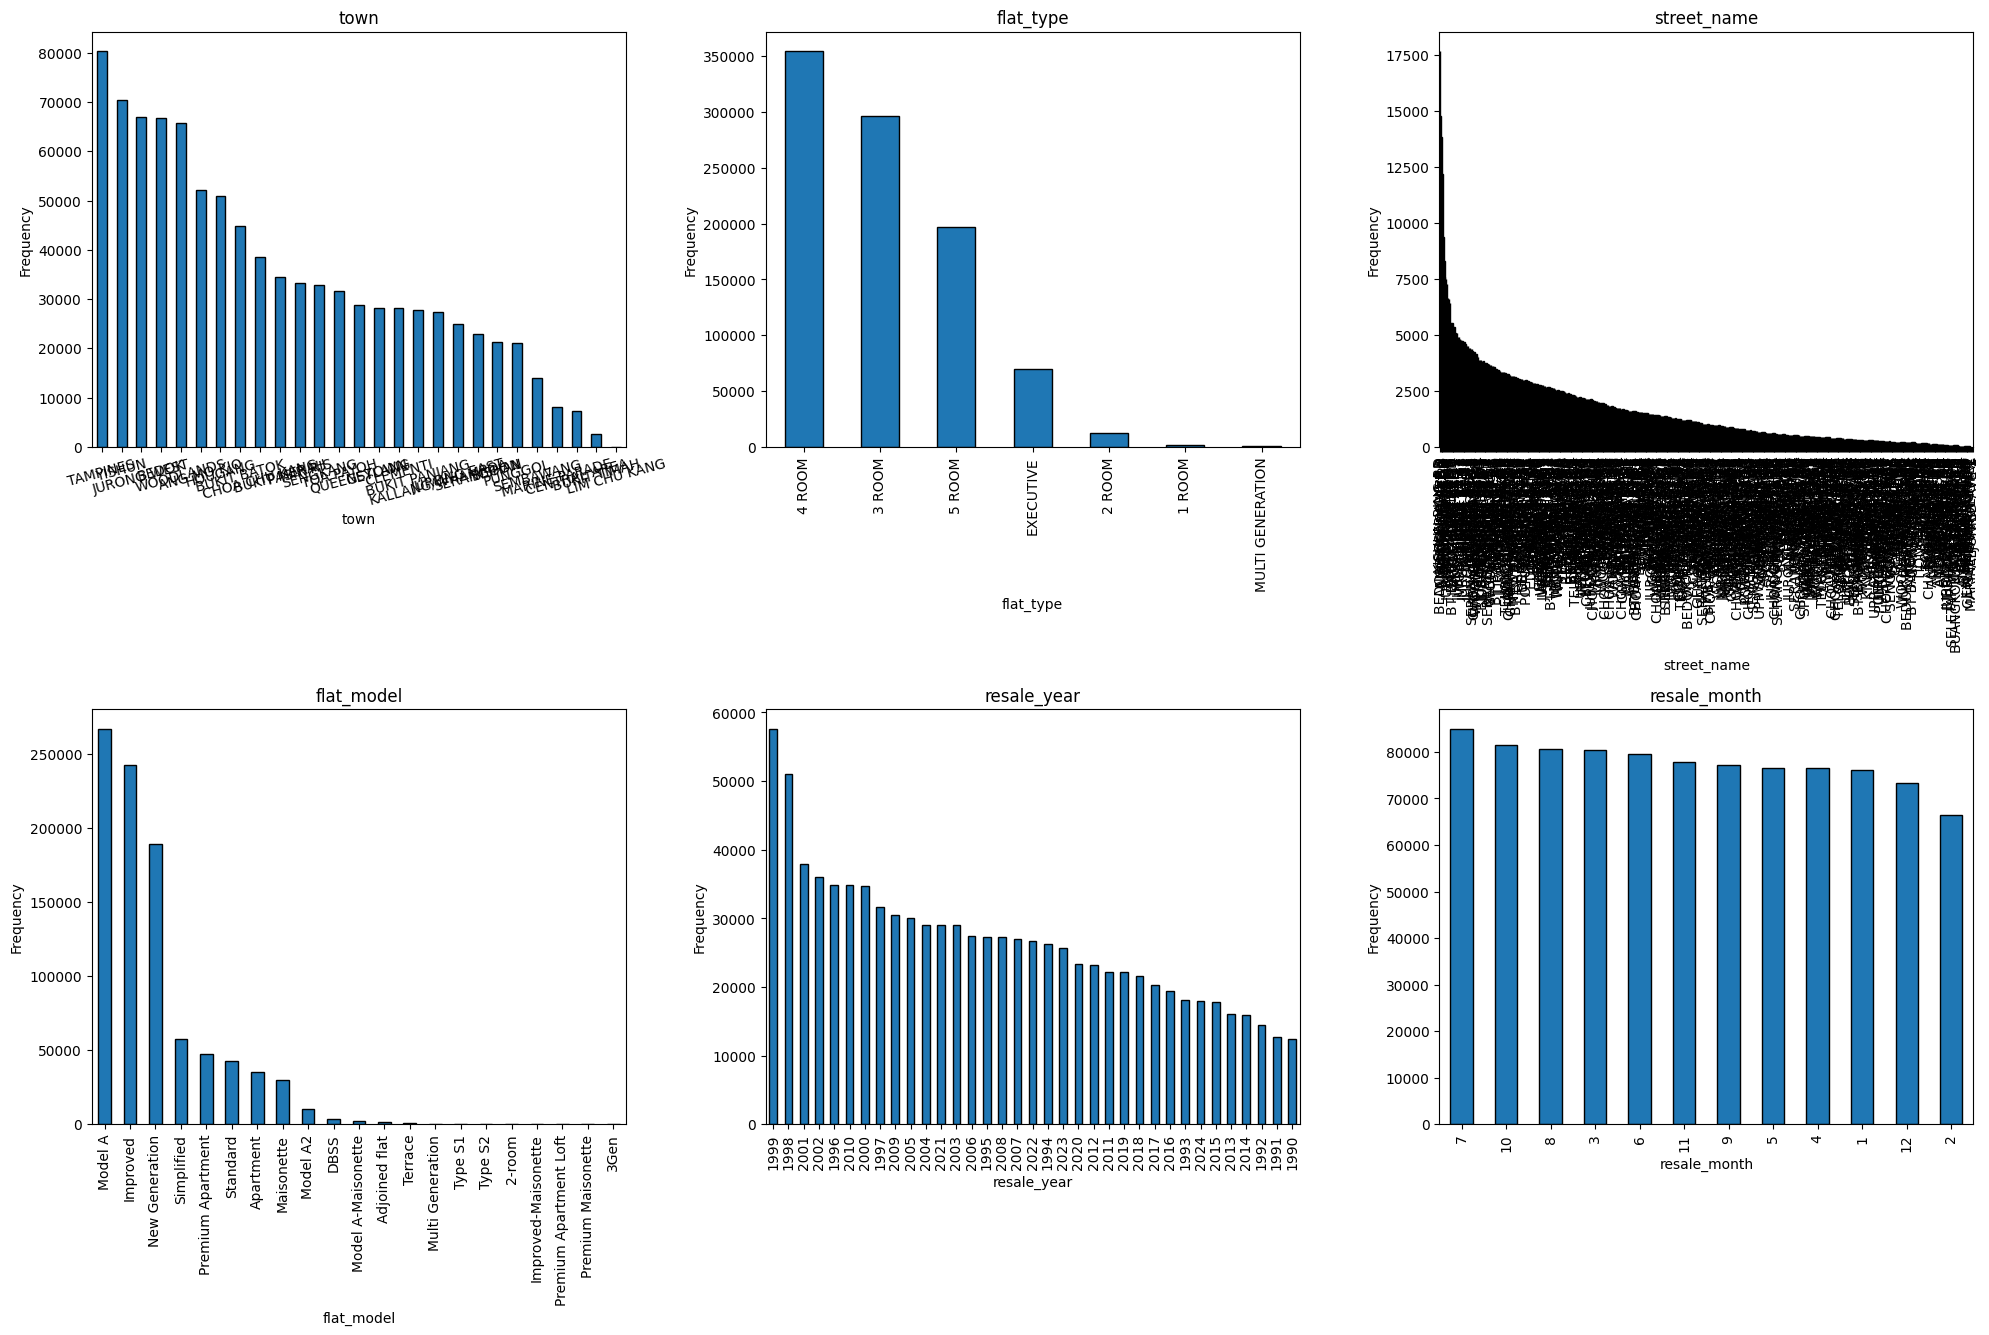

In [39]:
plt.figure(figsize=(20, 25))

plt.subplot(431)
df['town'].value_counts().sort_values(ascending=False).plot(kind='bar', edgecolor='k')
plt.title('town')
plt.xlabel('town')
plt.ylabel('Frequency')
plt.xticks(rotation=15)

plt.subplot(432)
df['flat_type'].value_counts().sort_values(ascending=False).plot(kind='bar', edgecolor='k')
plt.title('flat_type')
plt.xlabel('flat_type')
plt.ylabel('Frequency')

plt.subplot(433)
df['street_name'].value_counts().sort_values(ascending=False).plot(kind='bar', edgecolor='k')
plt.title('street_name')
plt.xlabel('street_name')
plt.ylabel('Frequency')

plt.subplot(434)
df['flat_model'].value_counts().sort_values(ascending=False).plot(kind='bar', edgecolor='k')
plt.title('flat_model')
plt.xlabel('flat_model')
plt.ylabel('Frequency')

plt.subplot(435)
df['resale_year'].value_counts().sort_values(ascending=False).plot(kind='bar', edgecolor='k')
plt.title('resale_year')
plt.xlabel('resale_year')
plt.ylabel('Frequency')

plt.subplot(436)
df['resale_month'].value_counts().sort_values(ascending=False).plot(kind='bar', edgecolor='k')
plt.title('resale_month')
plt.xlabel('resale_month')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


Encoding Categorical Variables

In [40]:
#using encoding make a copy
df1=df.copy()

In [41]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [42]:
# Initialize LabelEncoder
le = LabelEncoder()
# Fit and transform the 'flat_type' column
df1['flat_type'] = le.fit_transform(df1['flat_type'])

In [43]:
# Fit and transform the 'block' column
df1['block'] = le.fit_transform(df1['block'])

In [44]:
# Fit and transform the 'town' column
df1['town'] = le.fit_transform(df1['town'])

In [45]:
# Fit and transform the 'street_name' column
df1['street_name'] = le.fit_transform(df1['street_name'])

In [46]:
# Fit and transform the 'flat_model' column
df1['flat_model'] = le.fit_transform(df1['flat_model'])

In [47]:
df1.isna().sum()

town                   0
flat_type              0
block                  0
street_name            0
floor_area_sqm         0
flat_model             0
lease_commence_date    0
resale_price           0
storey_lower_bound     0
storey_upper_bound     0
resale_year            0
resale_month           0
dtype: int64

In [48]:
# save the processed data for the deployment
df1.to_csv('final.csv')

Heat map

In [49]:
correlation_matrix = df1.corr()

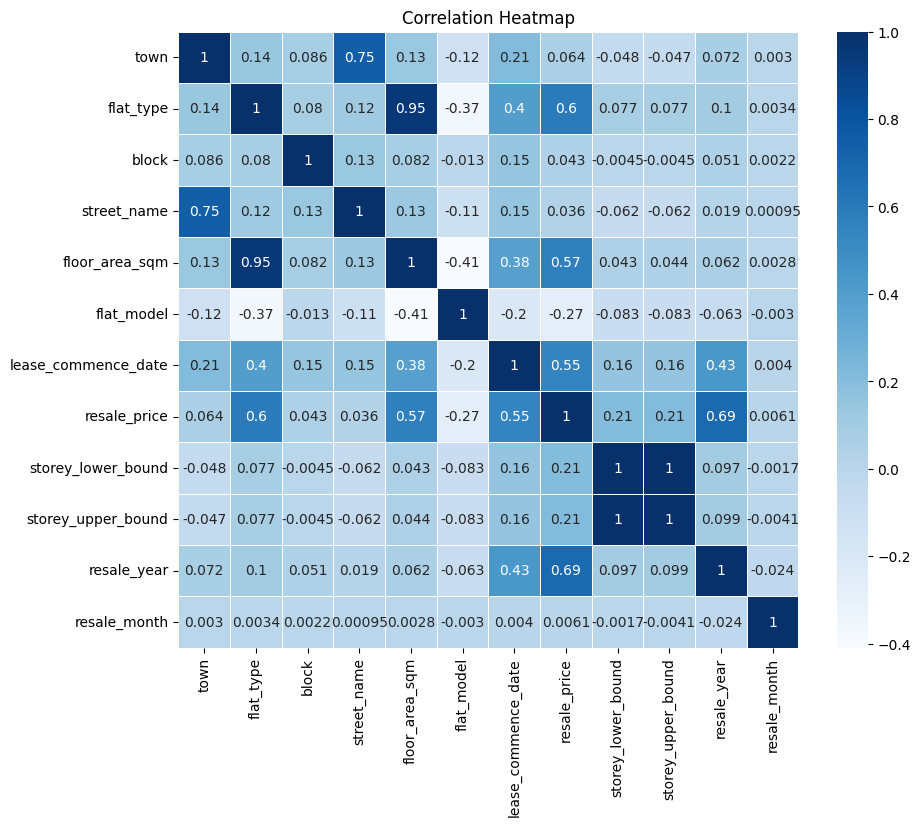

In [50]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="Blues", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

MEACHIN LEARNING

Model_Fit

In [51]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

import xgboost as xgb
from xgboost import XGBRegressor  # Use XGBRegressor for regression

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

Split

In [52]:
from sklearn.model_selection import train_test_split

# Define features and target variables from the DataFrame 'df1'
x = df1[['town', 'flat_type', 'block', 'street_name', 'floor_area_sqm','flat_model', 'lease_commence_date', 'storey_lower_bound', 
         'storey_upper_bound', 'resale_year', 'resale_month']]

y = df1['resale_price']  # Target variable: Resale price

# Drop rows with missing values in features
x = x.dropna()

# Align the target variable with the cleaned features
y = y[x.index]

# Split the data into training and testing sets with 30% for testing
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=72)

Train

In [53]:
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

(651931, 11) (279399, 11) (651931,) (279399,)


Scalling

In [54]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# Fit the scaler on the training data
scaler.fit(x_train)

# Transform the training and testing data
x_train_scaled = scaler.transform(x_train)
x_test_scaled = scaler.transform(x_test)

Linear Regression

In [ ]:
# Initialize the Linear Regression model
linear_model = LinearRegression(fit_intercept=True)  # Create the model with intercept calculation
# Fit the model on the training data
linear_model.fit(x_train, y_train)  # Train the model with training data (features and target values)
# Make predictions on the test data
predictions = linear_model.predict(x_test)  # Predict target values for the test data
y_test

In [56]:
# Evaluate the model using
linear_model.score(x_test,y_test)

0.7823150423415554

In [57]:
from sklearn.model_selection import cross_val_score
# Perform cross-validation on the training data
# cv=10 specifies 10-fold cross-validation
cross_val_linear_model= cross_val_score(linear_model,x_train,y_train,cv=10).mean()
cross_val_linear_model

np.float64(0.7819690226687168)

In [ ]:
# Initialize the Linear Regression model
linear_model = LinearRegression(fit_intercept=True)
# Train the model
linear_model.fit(x_train, y_train)
# Make predictions on the test data
predictions = linear_model.predict(x_test)
# Evaluate the model
mse = mean_squared_error(y_test, predictions)
r2 = r2_score(y_test, predictions)
# Print evaluation metrics
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")


K Nearest Neighbor Regression

In [58]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Assuming X_train_scaled and X_test_scaled are already defined and scaled
# Initialize the K-Nearest Neighbors Regressor
knn_regressor = KNeighborsRegressor(n_neighbors=5)

# Fit the model
knn_regressor.fit(x_train_scaled, y_train)

# Predict on the test set
y_pred_knn = knn_regressor.predict(x_test_scaled)

# Calculate evaluation metrics
mae_knn = mean_absolute_error(y_test, y_pred_knn)
mse_knn = mean_squared_error(y_test, y_pred_knn)
rmse_knn = np.sqrt(mse_knn)
r2_knn = r2_score(y_test, y_pred_knn)

# Print the results
print("Mean Absolute Error (MAE)    :", mae_knn)
print("Mean Squared Error (MSE)     :", mse_knn)
print("Root Mean Square Error (RMSE):", rmse_knn)
print("R-squared (R2) Score         :", r2_knn)

Mean Absolute Error (MAE)    : 31226.8956962337
Mean Squared Error (MSE)     : 2096110003.0880542
Root Mean Square Error (RMSE): 45783.2939300795
R-squared (R2) Score         : 0.9225991133206775


Decision Tree Regression

In [59]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Initialize the Decision Tree Regressor
decision_tree_regressor = DecisionTreeRegressor()

# Fit the model
decision_tree_regressor.fit(x_train_scaled, y_train)

# Predict on the test set
y_pred_tree = decision_tree_regressor.predict(x_test_scaled)

# Calculate evaluation metrics
mae_tree = mean_absolute_error(y_test, y_pred_tree)
mse_tree = mean_squared_error(y_test, y_pred_tree)
rmse_tree = np.sqrt(mse_tree)
r2_tree = r2_score(y_test, y_pred_tree)

# Print the results
print("Mean Absolute Error (MAE)    :", mae_tree)
print("Mean Squared Error (MSE)     :", mse_tree)
print("Root Mean Square Error (RMSE):", rmse_tree)
print("R-squared (R2) Score         :", r2_tree)

Mean Absolute Error (MAE)    : 18949.7354750017
Mean Squared Error (MSE)     : 812384590.1187441
Root Mean Square Error (RMSE): 28502.361132347338
R-squared (R2) Score         : 0.9700019142568028


Random Forest Regression

In [60]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Create and train the Random Forest Regressor model
rf_regressor = RandomForestRegressor(random_state=42)
rf_regressor.fit(x_train, y_train)

# Make predictions on the test set
y_pred = rf_regressor.predict(x_test)

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)

# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)

# Calculate R-squared (R2) Score
rf_r2 = r2_score(y_test, y_pred)

print("Mean Absolute Error (MAE)    :", mae)
print("Mean Squared Error (MSE)     :", mse)
print("Root Mean Square Error (RMSE):", rmse)
print("R-squared (R2) Score         :", rf_r2)

Mean Absolute Error (MAE)    : 14140.914860145018
Mean Squared Error (MSE)     : 430646755.1245006
Root Mean Square Error (RMSE): 20752.030144650922
R-squared (R2) Score         : 0.9840979525678027


Xg Boost Regression

In [61]:
import xgboost as xgb
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Initialize the XGBoost Regressor
xgb_regressor = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100, random_state=42)

# Fit the model
xgb_regressor.fit(x_train_scaled, y_train)

# Predict on the test set
y_pred_xgb = xgb_regressor.predict(x_test_scaled)

# Calculate evaluation metrics
mae_xgb = mean_absolute_error(y_test, y_pred_xgb)
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
rmse_xgb = np.sqrt(mse_xgb)
r2_xgb = r2_score(y_test, y_pred_xgb)

# Print the results
print("Mean Absolute Error (MAE)    :", mae_xgb)
print("Mean Squared Error (MSE)     :", mse_xgb)
print("Root Mean Square Error (RMSE):", rmse_xgb)
print("R-squared (R2) Score         :", r2_xgb)


Mean Absolute Error (MAE)    : 16842.69334559885
Mean Squared Error (MSE)     : 557613524.5680279
Root Mean Square Error (RMSE): 23613.841800266804
R-squared (R2) Score         : 0.9794095819578347


Save the model

In [62]:
model = rf_regressor.fit(x_train, y_train)

In [63]:
model

RandomForestRegressor(random_state=42)

In [64]:
# save the model to disk
from joblib import dump
import pickle

filename = 'RandomForestRegressor_model.pkl'
with open(filename, 'wb') as file:
    dump(model, file)

print(f"Saved {filename} model to disk")


Saved RandomForestRegressor_model.pkl model to disk


In [65]:
df1

,town,flat_type,block,street_name,floor_area_sqm,flat_model,lease_commence_date,resale_price,storey_lower_bound,storey_upper_bound,resale_year,resale_month
0,0,0,830,13,31.0,5,1977.0,9000.0,10,12,1990,1
1,0,0,830,13,31.0,5,1977.0,6000.0,4,6,1990,1
2,0,0,830,13,31.0,5,1977.0,8000.0,10,12,1990,1
3,0,0,830,13,31.0,5,1977.0,6000.0,7,9,1990,1
4,0,2,447,13,73.0,12,1976.0,47200.0,4,6,1990,1
...,...,...,...,...,...,...,...,...,...,...,...,...
933297,26,4,1873,572,121.0,5,1988.0,650000.0,7,9,2024,8
933298,26,4,2202,574,122.0,5,1987.0,652000.0,10,12,2024,8
933299,26,5,912,563,153.0,7,1988.0,757500.0,10,12,2024,8
933300,26,5,1872,572,146.0,7,1987.0,757500.0,1,3,2024,8
